In [27]:
%matplotlib inline

In [2]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# SIR model with control

States: $x = (S, I, R)$, where $S_{(t)}$ is susceptible population, $I_{(t)}$ is infective population and $R_{(t)}$ is recovered population.

$\dot S = S(A-S) - kIS$

$\dot I = kIS - \mu I - \frac{rI}{a + I}$

$\dot R = \frac{rI}{a + I} - \mu R$

Where $A$ is the carrying capacity in the absence of disease, $\mu$ is the natural death rate, $a$ represents a delay in the control action, $k$ and $r$ are the infection and cure rate, respectively.


Model purposed in:
*Qualitative and bifurcation analysis using an SIR model with a saturated treatment function,
Mathematical and Computer Modelling*, Jinliang Wang, Shengqiang Liu, Baowen Zheng, Yasuhiro Takeuchi,
Volume 55, Issues 3–4, 2012, Pages 710-722, ISSN 0895-7177

In [3]:
def sir_model_control(x, t, A, k, myu, r, a):
    S = x[0]
    I = x[1]
    R = x[2]
    
    S_dot = S*(A - S) - k*I*S
    I_dot = k*I*S - myu*I - ( (r*I)/(a+I) )
    R_dot = ( (r*I)/(a+I) ) - myu*R

    x_dot = [S_dot, I_dot, R_dot]
    return x_dot

In [29]:
A = 1
k = 0.1
myu = 0.002
r = 0.25
a = 0.2

x0 = [1.1, 8.0, 2.0]
t = np.linspace( 0, 100, 10000 )
solution = odeint( sir_model_control, x0, t, args = (A, k, myu, r, a) ) 

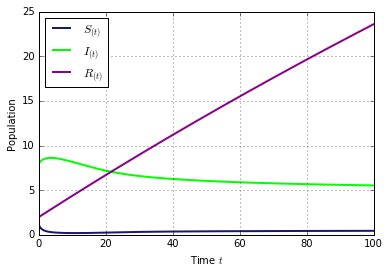

In [30]:
plt.figure()
plt.plot( t, solution[ : , 0 ], label = '$ S_{(t)} $', color = 'midnightblue', linewidth = 2.0)
plt.plot( t, solution[ : , 1 ], label = '$ I_{(t)} $', color = 'lime', linewidth = 2.0 )
plt.plot( t, solution[ : , 2 ], label = '$ R_{(t)} $', color = 'darkmagenta', linewidth = 2.0 )
plt.legend(loc = 'best')
plt.xlabel('Time $ t $')
plt.ylabel('Population')
plt.grid()
plt.show()